Here We are going to perform Linear Regression approach and see that how this algorithm is going to predict the future data of like counts

In [1]:
#Here We are Importing all the important Libraries that we are going to use in this Module

In [2]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
df1 = pd.read_csv("Filtered-1.csv")

In [4]:
df1

,t_day,t_month,t_year,Genre,views,likes,dislikes,comment_count
0,1,1,1,Science & Technology,3237,161,2,35
1,6,6,6,People & Blogs,43012,754,87,123
2,4,4,4,Science & Technology,3635,84,3,21
3,1,1,1,Music,2152261,7824,158,324
4,4,4,4,Entertainment,140520,1852,33,113
...,...,...,...,...,...,...,...,...
6450,4,4,4,People & Blogs,300769,8595,150,2802
6451,8,8,8,People & Blogs,157819,19559,52,1962
6452,7,7,7,Howto & Style,193794,7547,78,824
6453,8,8,8,People & Blogs,193223,8141,302,1226


Dividing the data into X as Input Features and y as output features

In [5]:
X = df1[['Genre','views','dislikes','comment_count']]

In [6]:
y = df1['likes']

Here we are using the technique of OneHotEncoder to encode our discrete values and giving them same preference in our input features

In [7]:
oh = OneHotEncoder()

In [8]:
enc = oh.fit_transform(df1[['Genre']]).toarray()

In [9]:
encode = pd.DataFrame(enc)

In [10]:
for i in range(15):
  df1[i]=encode[i].values

In [11]:
df1

,t_day,t_month,t_year,Genre,views,likes,dislikes,comment_count,0,1,...,5,6,7,8,9,10,11,12,13,14
0,1,1,1,Science & Technology,3237,161,2,35,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,6,6,6,People & Blogs,43012,754,87,123,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4,4,4,Science & Technology,3635,84,3,21,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,1,1,Music,2152261,7824,158,324,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,4,Entertainment,140520,1852,33,113,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6450,4,4,4,People & Blogs,300769,8595,150,2802,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6451,8,8,8,People & Blogs,157819,19559,52,1962,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6452,7,7,7,Howto & Style,193794,7547,78,824,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6453,8,8,8,People & Blogs,193223,8141,302,1226,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


As we can see in our upper dataframe we have filtered out data and created some more columns

In [12]:
X = df1.drop(['t_day','t_month','t_year','likes','Genre'],axis = 1)

In [13]:
y = df1['likes']

In [14]:
X

,views,dislikes,comment_count,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3237,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,43012,87,123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3635,3,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2152261,158,324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,140520,33,113,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6450,300769,150,2802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6451,157819,52,1962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6452,193794,78,824,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6453,193223,302,1226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


The above Data Frame is our Input Feature for our Linear Regression Algorithm

In [15]:
y

0         161
1         754
2          84
3        7824
4        1852
        ...  
6450     8595
6451    19559
6452     7547
6453     8141
6454    19965
Name: likes, Length: 6455, dtype: int64

The above data is the output feature for our model

Here We are Dividing our dataset into train and test dataset for calculating the result and checking the accuracy of it and we are taking test size as 25% of the whole data

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

Here we are Creating the object of our Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

Here We are fitting our X_train and y_train data into our model

In [18]:
lr.fit(X_train,y_train)

c:\Users\singh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [19]:
y_pred = lr.predict(X_test)

c:\Users\singh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Here we are importing some graphical library like matplotlib and seaborn for checking the result in graphical representation as well

In [20]:
import matplotlib.pyplot as plt

In [21]:
import seaborn as sns

In [22]:
y_test.values

array([ 45690,   6145,  15281, ..., 306711,  18073,   2776], dtype=int64)

<AxesSubplot: xlabel='views'>

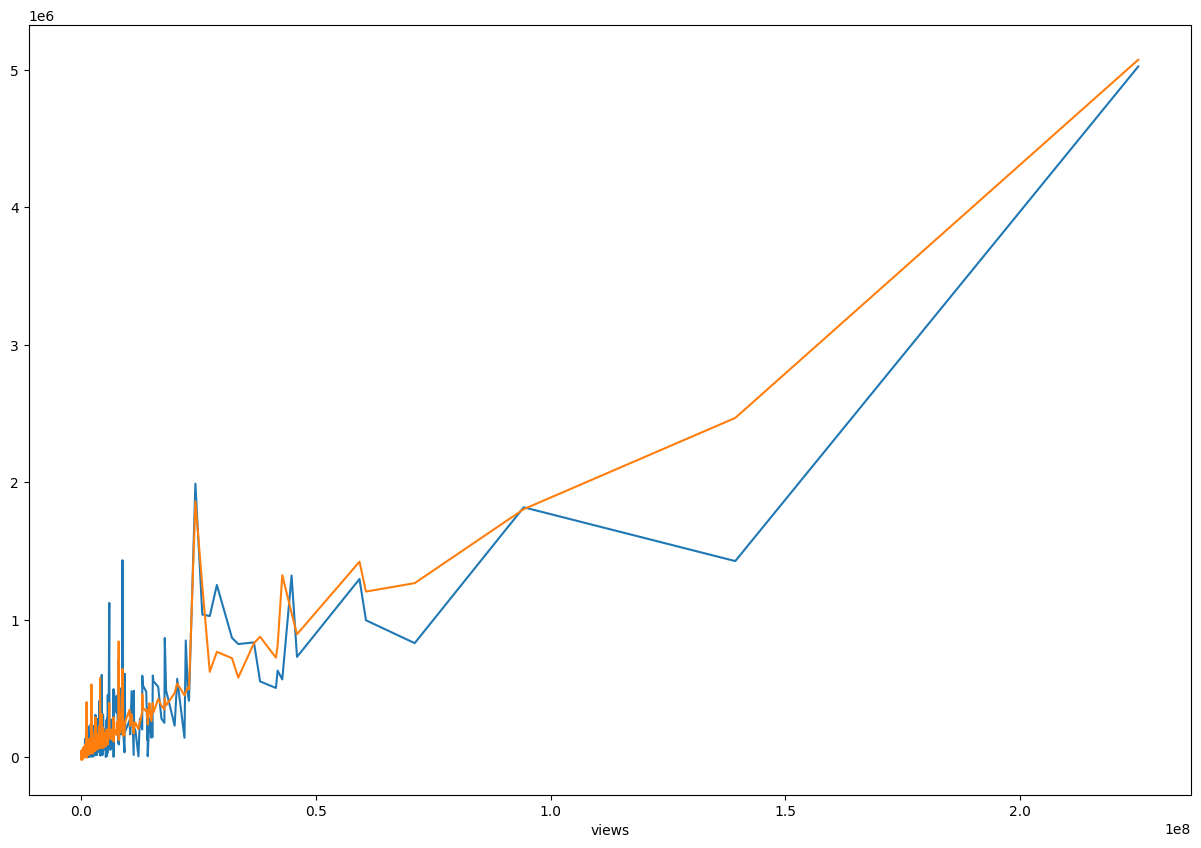

In [23]:
plt.figure(figsize=(15,10))
sns.lineplot(x = X_test['views'],y = y_test.values)
sns.lineplot(x = X_test['views'],y = y_pred)

Here Blue Line Indicating the Actual Like Value from our test dataset and Here Orange Line Indicating the Predicted Like value from our test dataset , we can clearly conclude that our Linear Regression Model is performing pretty much well on this dataset 


In [24]:
lr.score(X_test,y_test)

c:\Users\singh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.8855673152819808

Our accuracy Score for this model is nearly 90%

In [25]:
X_train

,views,dislikes,comment_count,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
5091,13831320,20532,35732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2691,1185773,1378,4794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5166,886234,706,6881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5520,327739,52,160,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
393,1130020,823,1088,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,965328,699,421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4334,1208627,958,4922,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2285,1823566,1234,4908,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3724,132889,53,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Create GUI by ipywidgets for interactive predictive model so that users just have to run the cell and can predict the like count

In [26]:
x = widgets.IntSlider(
    value=7,
    min=0,
    max=1000000,
    step=1,
    description='Views:',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='d'
)
y = widgets.IntSlider(
    value=7,
    min=0,
    max=100000,
    step=1,
    description='dislike:',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='d'
)


z = widgets.IntSlider(
    value=7,
    min=0,
    max=10000,
    step=1,
    description='comment_count:',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='d'
)


k = widgets.Dropdown(
    options=list(df1['Genre'].unique()),
    value=None,
    description='Genre:',
    disabled=False,
)
view = []
dis = []
com = []
Gen = []

def view_take(vi):
  view.clear()
  view.append(vi)

def dislike_take(di):
  dis.clear()
  dis.append(di)
def comment_take(ci):
  com.clear()
  com.append(ci)
def Genre_take(gi):
  print(gi)
  # ty = np.array(df1.loc[[0],0:][df1['Genre']==gi])
  ty = np.array(df1.loc[:,0:][df1['Genre']==gi])[0]
  Gen.clear()
  Gen.append(list(ty))




In [27]:
widgets.interact(view_take,vi=x)
widgets.interact(dislike_take,di=y)
widgets.interact(comment_take,ci=z)
widgets.interact(Genre_take,gi=k)

interactive(children=(IntSlider(value=7, continuous_update=False, description='Views:', max=1000000, orientati…

interactive(children=(IntSlider(value=7, continuous_update=False, description='dislike:', max=100000, orientat…

interactive(children=(IntSlider(value=7, continuous_update=False, description='comment_count:', max=10000, ori…

interactive(children=(Dropdown(description='Genre:', options=('Science & Technology', 'People & Blogs', 'Music…

<function __main__.Genre_take(gi)>

In [ ]:

def pred():
    pred_value = lr.predict([view+dis+com+Gen[0]])
    print('Total Like Count is ','------',int(pred_value))
    return int(pred_value)

widgets.IntProgress(
    value=pred(),
    min=0,
    max=100000,
    description='Loading:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    style={'bar_color': 'maroon'},
    orientation='vertical'
    )

Total Like Count is  ------ 13661


IntProgress(value=13661, description='Loading:', max=100000, orientation='vertical', style=ProgressStyle(bar_c…